In [1]:
import pandas as pd
import quandl

In [2]:
'Hello'

'Hello'

# Pulling bulk Petroleum Data in JSON format
http://api.eia.gov/bulk/PET.zip

# Pulled API codes from Quandl  
https://www.quandl.com/api/v3/databases/EIA/codes

In [3]:
eia_codes = pd.read_csv('EIA-datasets-codes.csv',names=['API Key','Description'])
eia_codes

,API Key,Description
0,EIA/AEO_2016_EXPREPALL_ECI_SAL_TRN_LDTY_EPACLE...,Light-Duty Vehicle Sales ; EPACT Legislative A...
1,EIA/AEO_2016_EXPREPALL_ECI_SAL_TRN_LDTY_FXF_NA...,"Light-Duty Vehicle Sales ; Total Sales, Cars a..."
2,EIA/AEO_2016_EXPREPALL_MKS_TP_AIRT_LAFC_NA_NA_...,Air Travel ; Advanced Technology Penetration ;...
3,EIA/AEO_2016_EXPREPALL_KEI_TRV_TRN_NA_RAIL_NA_...,"Transportation ; Travel Indicators ; Rail, Exp..."
4,EIA/AEO_2016_EXPREPALL_KEI_FLR_COMM_OFLC_NA_NA...,"Commercial ; Floorspace ; Office - Large, Expo..."
5,EIA/AEO_2016_EXPREPALL_MKS_TP_NA_AER1_NA_NA_NA...,Technology Market Penetration ; LDV ; Aerodyna...
6,EIA/AEO_2016_EXPREPALL_MKS_TP_NA_HEFGRBX_NA_NA...,Technology Market Penetration ; LDV ; High Eff...
7,EIA/AEO_2016_EXPREPALL_ECI_SMD_AIRT_NBTR_NA_NA...,Air Travel ; Seat Miles Demanded ; U.S.; Narro...
8,EIA/AEO_2016_EXPREPALL_MKS_TP_LTK_DOHC36_NA_NA...,Technology Market Penetration ; Light Truck ; ...
9,EIA/AEO_2016_EXPREPALL_EMI_CO2_COMM_NA_NA_NA_M...,"Carbon Dioxide ; Commercial ; Total, Mountain,..."


### What information is available in the description?

In [4]:
eia_codes.loc[14]

API Key                         EIA/INTL_64_3_COK_TBPD_A
Description    Imports of Kerosene, Cook Islands, Annual
Name: 14, dtype: object

### Search for Monthly Crude Oil codes only
- Need to filter down a bit more

In [5]:
eia_codes[eia_codes['Description'].str.contains('Crude Oil|Monthly')]

,API Key,Description
27,EIA/PET_M_EPPK_EEX_NUS_NBX_MBBLD_M,"U.S. Exports to Brunei of Kerosene, Monthly"
28,EIA/PET_M_EPOBGC0_IM0_NUS_NSK_2_M,U.S. Imports from Slovakia of Conventional Gas...
29,EIA/AEO_2016_EXPREPALL_RSV_NA_NA_NA_CR_NA_L48_...,"Lower 48 Reserves ; Crude Oil, Export Report, ..."
56,EIA/PET_MD1NT_NUS_NLI_2_M,U.S. Net Imports from Liberia of Distillate Fu...
63,EIA/PET_EMA_EPMRU_PWA_SNH_DPG_M,New Hampshire Conventional Gasoline Regular Wh...
66,EIA/PET_EMA_EPMPU_PRA_R1Z_DPG_M,Lower Atlantic (PADD 1C) Conventional Gasoline...
67,EIA/PET_EMA_EPMPU_PBS_SIN_DPG_M,Indiana Conventional Gasoline Premium Bulk Sal...
68,EIA/PET_EMA_EPD2DH_POA_R10_DPG_M,East Coast (PADD 1) No 2 Diesel High Sulfur Ot...
70,EIA/PET_M_EPC43B_FPF_SWY_MBBLD_M,Wyoming Crude Oil and Lease Condensate Product...
73,EIA/PET_EMA_EPM0R_PTA_STX_DPG_M,Texas Reformulated Gasoline Retail Sales by Al...


In [ ]:
eia_codes[eia_codes['API Key'].str.contains('PET|Monthly|U.S.')] 

# Obtain your own Quandl API code

In [2]:
quandl.ApiConfig.api_key = "your_code_here"

- Next cell is very bulky  
- Figure out a better way

In [6]:
crude = pd.concat([
        ### Data sets in (Thousand Barrels) only ###
        
        #EIA Data Sets > Petroleum > Summary
        #EIA Data Sets > Petroleum > Prices
        #EIA Data Sets > Petroleum > Crude Reserves and Production
        #EIA Data Sets > Petroleum > Refining and Processing
        #EIA Data Sets > Petroleum > Imports/Exports and Movements
        #EIA Data Sets > Petroleum > Stocks
        #EIA Data Sets > Petroleum > Consumption/Sales
    
        #EIA Data Sets > Petroleum > Summary
        #EIA Data Sets > Petroleum > Summary > Supply and Disposition > by Product > Crude Oil
        quandl.get('EIA/PET_MCRSCUS1_M'), #U.S. Crude Oil Stock Change, Monthly
        quandl.get('EIA/PET_MCRSTUS1_M'), #U.S. Ending Stocks of Crude Oil, Monthly
        quandl.get('EIA/PET_MCREXUS1_M'), #U.S. Exports of Crude Oil, Monthly
        quandl.get('EIA/PET_MCRFPUS1_M'), #U.S. Field Production of Crude Oil, Monthly
        quandl.get('EIA/PET_MCRIMUS1_M'), #U.S. Imports of Crude Oil, Monthly
        quandl.get('EIA/PET_MCRUPUS1_M'), #U.S. Product Supplied of Crude Oil, Monthly
        quandl.get('EIA/PET_MCRRIUS1_M'), #U.S. Refinery and Blender Net Input of Crude Oil, Monthly
        quandl.get('EIA/PET_MCRUA_NUS_1_M'), #U.S. Supply Adjustment of Crude Oil, Monthly
        
        #EIA Data Sets > Petroleum > Summary > Weekly Supply Estimates > by Data Series
        
    
        #EIA Data Sets > Petroleum > Summary > U.S. Crude Oil Supply & Disposition
    
    
        #EIA Data Sets > Petroleum > Prices
        #EIA Data Sets > Petroleum > Prices > Spot Prices
#         quandl.get('EIA/PET_RWTC_D'), #Cushing, OK WTI Spot Price FOB, Daily
        quandl.get('EIA/PET_RWTC_M'), #Cushing, OK WTI Spot Price FOB, Monthly

        #EIA Data Sets > Petroleum > Prices > NYMEX Futures Prices
        quandl.get('EIA/PET_RCLC1_M'), #Cushing, OK Crude Oil Future Contract 1, Monthly
        quandl.get('EIA/PET_RCLC2_M'), #Cushing, OK Crude Oil Future Contract 2, Monthly
        quandl.get('EIA/PET_RCLC3_M'), #Cushing, OK Crude Oil Future Contract 3, Monthly
        quandl.get('EIA/PET_RCLC4_M'), #Cushing, OK Crude Oil Future Contract 4, Monthly
    
        #EIA Data Sets > Petroleum > Crude Reserves and Production
        #EIA Data Sets > Petroleum > Crude Reserves and Production > Crude Oil Production
        quandl.get('EIA/PET_MCRFPUS1_M'), #U.S. Field Production of Crude Oil, Monthly
        
        #EIA Data Sets > Petroleum > Crude Reserves and Production > Crude Oil and Natural Gas Drilling Activity
        quandl.get('EIA/PET_E_ERTRRO_XR0_NUS_C_M'), #U.S. Crude Oil Rotary Rigs in Operation, Monthly
        quandl.get('EIA/PET_E_ERTS0_XRS_NUS_C_M'), #U.S. Crude Oil and Natural Gas Active Well Service Rigs in operation, Monthly
        quandl.get('EIA/PET_E_ERTRR0_XR0_NUS_C_M'), #U.S. Crude Oil and Natural Gas Rotary Rigs in Operation, Monthly
        quandl.get('EIA/PET_E_ERTRR0_XR0_RUSOF_C_M'), #U.S. Offshore Crude Oil and Natural Gas Rotary Rigs in Operation, Monthly
        quandl.get('EIA/PET_E_ERTRR0_XR0_RUSON_C_M'), #U.S. Onshore Crude Oil and Natural Gas Rotary Rigs in Operation, Monthly
    
        #EIA Data Sets > Petroleum > Crude Reserves and Production > Crude Oil and Natural Gas Exploratory and Development Wells
        quandl.get('EIA/PET_E_ERTWO_XWCD_NUS_C_M'), #U.S. Crude Oil Developmental Wells Drilled, Monthly
        quandl.get('EIA/PET_E_ERTWO_XWCE_NUS_C_M'), #U.S. Crude Oil Exploratory Wells Drilled, Monthly 
        quandl.get('EIA/PET_E_ERTW0_XWCD_NUS_C_M'), #U.S. Crude Oil, Natural Gas, and Dry Developmental Wells Drilled, Monthly
   
        #EIA Data Sets > Petroleum > Crude Reserves and Production > Costs of Crude Oil and Natural Gas Wells Drilled
        quandl.get('EIA/PET_E_ERTWO_XWWN_NUS_MDW_A') #U.S. Nominal Cost per Crude Oil Well Drilled, Annual    
    
        ##EIA Data Sets > Petroleum > Refining and Processing
    
        ##EIA Data Sets > Petroleum > Imports/Exports and Movements
    
        ##EIA Data Sets > Petroleum > Stocks
    
        ##EIA Data Sets > Petroleum > Consumption/Sales

        ],axis=1)
crude.tail()

,Value,Value,Value,Value,Value,Value,Value,Value,Value,Value,...,Value,Value,Value,Value,Value,Value,Value,Value,Value,Value
Date,,,,,,,,,,,,,,,,,,,,,
2016-10-31,19757.0,1183910.0,15216.0,272339.0,235827.0,0.0,479085.0,5892.0,49.78,49.87,...,272339.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-30,-186.0,1183724.0,17916.0,265886.0,241606.0,0.0,486561.0,-3201.0,45.66,45.87,...,265886.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-31,-4310.0,1179414.0,13691.0,272039.0,243664.0,0.0,511924.0,5602.0,51.97,52.17,...,272039.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-31,20124.0,1199538.0,23126.0,273890.0,261497.0,0.0,500013.0,7876.0,52.50,52.61,...,273890.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.47,53.46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Auto-increment column numbers based on length in columns list

- Figure out how to add new column headers

In [7]:
ncd = {}
si = 0
for num, cn in enumerate(list(crude.columns)):
#     print(num, cn)
    ncd[str(num)] = cn
print (ncd)

{'0': 'Value', '1': 'Value', '2': 'Value', '3': 'Value', '4': 'Value', '5': 'Value', '6': 'Value', '7': 'Value', '8': 'Value', '9': 'Value', '10': 'Value', '11': 'Value', '12': 'Value', '13': 'Value', '14': 'Value', '15': 'Value', '16': 'Value', '17': 'Value', '18': 'Value', '19': 'Value', '20': 'Value', '21': 'Value', '22': 'Value'}


In [8]:
keys= ncd.keys()
print(keys)

values= ncd.values()
print(values)

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22'])
dict_values(['Value', 'Value', 'Value', 'Value', 'Value', 'Value', 'Value', 'Value', 'Value', 'Value', 'Value', 'Value', 'Value', 'Value', 'Value', 'Value', 'Value', 'Value', 'Value', 'Value', 'Value', 'Value', 'Value'])


In [11]:
crude.columns = keys
crude.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1166 entries, 1920-01-31 to 2017-02-28
Freq: M
Data columns (total 23 columns):
0     433 non-null float64
1     1165 non-null float64
2     1165 non-null float64
3     1165 non-null float64
4     1165 non-null float64
5     433 non-null float64
6     433 non-null float64
7     433 non-null float64
8     374 non-null float64
9     407 non-null float64
10    386 non-null float64
11    408 non-null float64
12    386 non-null float64
13    1165 non-null float64
14    347 non-null float64
15    521 non-null float64
16    522 non-null float64
17    522 non-null float64
18    522 non-null float64
19    456 non-null float64
20    456 non-null float64
21    456 non-null float64
22    48 non-null float64
dtypes: float64(23)
memory usage: 218.6 KB


In [12]:
crude.corr()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1.000000,-0.047702,0.101816,0.151773,-0.061217,0.135777,-0.183437,0.135755,-0.032231,-0.040152,...,0.151773,0.011545,0.038838,0.125363,0.115321,0.128816,0.182527,0.184868,0.175749,-0.168284
1,-0.047702,1.000000,0.318139,0.205564,0.864897,-0.742723,0.689447,-0.000792,0.661724,0.616235,...,0.205564,0.504429,-0.298971,-0.409896,-0.561309,-0.385311,-0.345997,-0.422109,-0.168479,0.538194
2,0.101816,0.318139,1.000000,0.195589,0.139547,0.230355,0.012890,0.065950,-0.008852,-0.027230,...,0.195589,0.398300,0.227272,0.213493,0.194566,0.208002,0.561742,0.562726,0.424456,-0.120028
3,0.151773,0.205564,0.195589,1.000000,0.348373,0.676301,-0.377511,0.105365,-0.225333,-0.257733,...,1.000000,0.491928,0.408574,0.335452,0.413639,0.317474,0.599606,0.643021,0.302935,-0.682443
4,-0.061217,0.864897,0.139547,0.348373,1.000000,-0.891260,0.836080,-0.142436,0.444865,0.432272,...,0.348373,-0.255729,-0.585605,-0.323136,-0.478467,-0.296507,-0.582795,-0.625483,-0.270346,0.659960
5,0.135777,-0.742723,0.230355,0.676301,-0.891260,1.000000,-0.806263,0.028830,-0.462336,-0.397110,...,0.676301,-0.000270,0.784810,0.510910,0.735824,0.471097,0.841117,0.845325,0.633836,-0.452776
6,-0.183437,0.689447,0.012890,-0.377511,0.836080,-0.806263,1.000000,-0.039327,0.420062,0.419855,...,-0.377511,0.140094,-0.727602,-0.330184,-0.585471,-0.293059,-0.645219,-0.675173,-0.401212,0.571708
7,0.135755,-0.000792,0.065950,0.105365,-0.142436,0.028830,-0.039327,1.000000,-0.150057,-0.145453,...,0.105365,0.085668,0.085148,-0.146497,-0.008407,-0.142387,-0.081424,-0.072612,-0.191439,-0.327460
8,-0.032231,0.661724,-0.008852,-0.225333,0.444865,-0.462336,0.420062,-0.150057,1.000000,0.999984,...,-0.225333,0.606325,-0.520732,0.871991,-0.626990,0.893079,0.380319,0.228348,0.743570,0.968363
9,-0.040152,0.616235,-0.027230,-0.257733,0.432272,-0.397110,0.419855,-0.145453,0.999984,1.000000,...,-0.257733,0.605805,-0.476887,0.624246,-0.532917,0.681036,0.102478,0.061778,0.428722,0.949396


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
%matplotlib inline

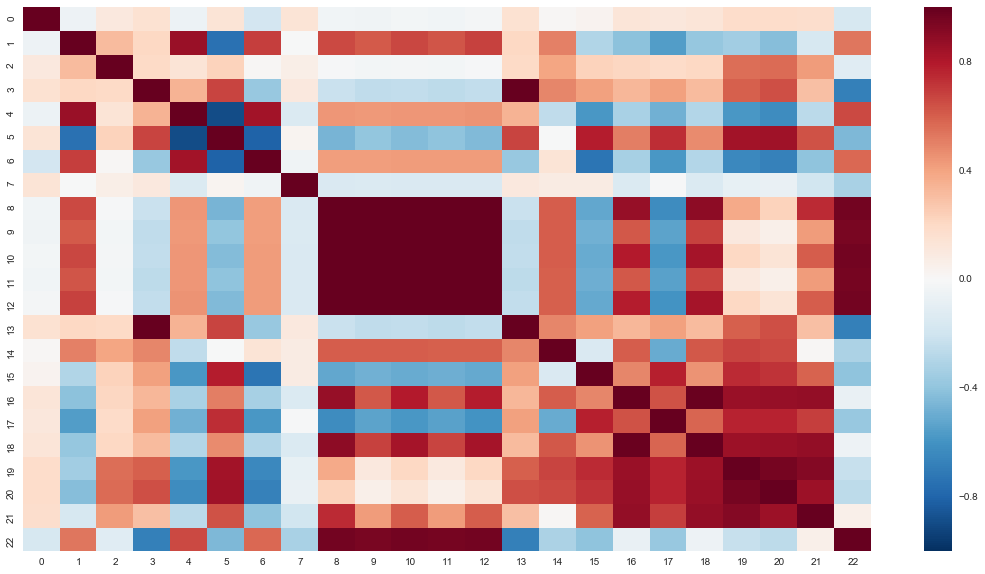

In [37]:
plt.figure(figsize = (19,10))
sns.heatmap(crude.corr())

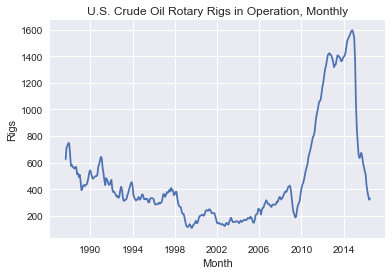

In [24]:
plt.plot(crude['14'])
plt.title('U.S. Crude Oil Rotary Rigs in Operation, Monthly')
plt.xlabel('Month')
plt.ylabel('Rigs')